<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABD/blob/main/%D0%9D%D0%A1_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

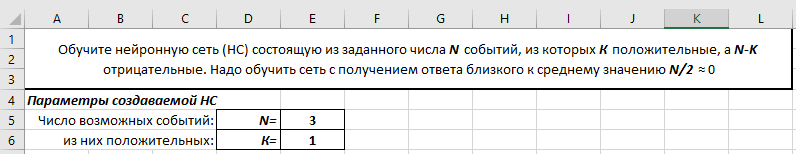

**Вариант 1**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Заданные параметры
N = 3  # Число возможных событий
K = 1  # Число положительных событий

# Генерация обучающих данных
inputs = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=torch.float32)
target = torch.tensor([[0.5] * inputs.shape[0]], dtype=torch.float32).T  # Среднее значение N/2

# Определение класса нейронной сети
class CustomNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(CustomNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Создание экземпляра модели
input_size = N
hidden_size = 10  # Размер скрытого слоя (можно экспериментировать с этим параметром)
model = CustomNN(input_size, hidden_size)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Обучение модели
def train_model(model, criterion, optimizer, inputs, target, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Обучение модели
print("Training model:")
train_model(model, criterion, optimizer, inputs, target)

# Тестирование модели
test_input = torch.tensor([[1, 0, 0]], dtype=torch.float32)  # Проверяем событие [1, 0, 0]
predicted_output = model(test_input).item()
print(f"\nПрогнозируемый выход для [1, 0, 0]: {predicted_output:.4f}")

Training model:
Epoch [100/1000], Loss: 0.0001
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000

Прогнозируемый выход для [1, 0, 0]: 0.5011


**Вариант 2. **

Для обучения нейронной сети с заданными параметрами можно использовать следующий подход:

1. Определение входных и выходных данных:
   - Входные данные: N=3 бинарных признака, где 1 соответствует положительному событию, а 0 - отрицательному.
   - Выходные данные: Скалярное значение, близкое к среднему значению N/2 ≈ 0.

2. Выбор архитектуры нейронной сети:
   - Входной слой: N=3 нейрона, по одному на каждый признак.
   - Скрытые слои: Можно использовать один или несколько скрытых слоев с подходящим количеством нейронов для моделирования нелинейных зависимостей.
   - Выходной слой: 1 нейрон, выдающий скалярное значение.

3. Функции активации:
   - Для скрытых слоев можно использовать функции активации, такие как ReLU (Rectified Linear Unit) или таnh.
   - Для выходного слоя можно использовать линейную функцию активации, чтобы получить значение, близкое к N/2 ≈ 0.

4. Функция ошибки и оптимизация:
   - Функция ошибки: Можно использовать среднеквадратичную ошибку (MSE) или другую подходящую функцию ошибки.
   - Алгоритм оптимизации: Применить метод градиентного спуска, например, Adam или SGD, для обновления весов нейронной сети.

5. Процесс обучения:
   - Разделить данные на обучающую и тестовую выборки.
   - Провести несколько эпох обучения, отслеживая ошибку на обучающей и тестовой выборках.
   - Остановить обучение, когда ошибка на тестовой выборке достигнет приемлемого уровня.

6. Применение обученной модели:
   - Использовать обученную нейронную сеть для получения выходных значений, близких к N/2 ≈ 0, для новых входных данных.

Пример реализации данного подхода на Python с использованием библиотеки TensorFlow/Keras:

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Определение параметров
N = 3
K = 1

# Генерация случайных данных
X = np.random.randint(2, size=(100, N))
y = np.mean(X, axis=1)

# Создание модели
model = Sequential()
model.add(Dense(8, input_dim=N, activation='relu'))
model.add(Dense(1, activation='linear'))

# Компиляция и обучение модели
model.compile(loss='mean_squared_error', optimizer=Adam())
model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

# Применение модели
new_X = np.random.randint(2, size=(1, N))
new_y = model.predict(new_X)
print(f"Входные данные: {new_X[0]}")
print(f"Выходное значение: {new_y[0,0]}")

1/1 [==============================] - 0s 49ms/step
Входные данные: [0 1 1]
Выходное значение: 0.6720442771911621
